#  Lab Assignment One: Exploring Table or Text Data 

   ## --- Google Play Store Apps

#### Group : Lone Wolf

####  Member : Yang Shen

## 1. Business Understanding

Data source : https://www.kaggle.com/lava18/google-play-store-apps

As we know, the cellphone plays a important role in our life since recently 10 years. Nowadays, people can not leave cell phone in daily life. It provides us convenience in life and also provide a lot of information. So that the cell phone industry is a big cake which ton of new apps appear every day. Since the market saturation, it is harder to successed in certain type of app market such as video apps. YouTube is domination the market. How to make new apps that will get more installations and higher rating are the critical questions for app developers. This dataset is about google play store apps data. This information is scraped from the Google Play Store. 
The purpose of analysis this dataset is to figure out how we can be success in app market. 

The third party which will be interested are app development team. There are two key indicator, rating and installation. The main modeling prediction is about the installations. 

The performance of modeling will be determined by the accuracy. So that I want the false positive rate as low as possible. Which means that the variables I choose which directly caused more installations are not useful. This will cause the developer team to focus on the wrong attributes, it will lead the app to unsuccess, losing money and time. I do not know how the accurate will be, but there is always risk in business. We can not say that 100% is realistic, but the false positive rate should as low as possible to minimize the business risk. There is also one attribute which related to the installations which is rating. We can say that rating is another indicator of success, but it doesn’t directly reflect the revenue. The rating will become inaccurate when there are only few people rating and it get a high score. For example, if I use calcification to set different cluster, one cluster have high installations, but the rating is base on minority of people. This is a kind of false positive because the attribute is base on bios perspective. So, I want to add an algorithm to define the rating value to improve the performance. My algorithm will be like the ratio of review and installation, I will put them together and find a threshold to determine the reliability of rating.


## 2. Data Understanding

### 2.1 Data Description

In [1]:

# load the dataset
import pandas as pd
import numpy as np

print('Pandas:', pd.__version__)
print('Numpy:',np.__version__)

dfraw = pd.read_csv('https://raw.githubusercontent.com/sy0701611/labone/master/googleplaystore.csv') # read in the csv file

dfraw.head() 

Pandas: 0.24.2
Numpy: 1.16.2


,App,Category,Rating,Reviews,SizeMB,Installs,Type,Price,ContentRating,Genres,LastUpdated,CurrentVer,AndroidVer,Installsthousand,Free
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000",Free,0.0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3,10.0,1
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000",Free,0.0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3,500.0,1
2,"U Launcher Lite ?€? FREE Live Cool Themes, Hid...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000",Free,0.0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3,5000.0,1
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000",Free,0.0,Teen,Art & Design,8-Jun-18,NaN,4.2,50000.0,1
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000",Free,0.0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4,100.0,1


In [2]:
#extract the year from date 
#https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DatetimeIndex.html
dfraw['year'] = pd.DatetimeIndex(dfraw['LastUpdated']).year
dfraw.head()


,App,Category,Rating,Reviews,SizeMB,Installs,Type,Price,ContentRating,Genres,LastUpdated,CurrentVer,AndroidVer,Installsthousand,Free,year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000",Free,0.0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3,10.0,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000",Free,0.0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3,500.0,1,2018
2,"U Launcher Lite ?€? FREE Live Cool Themes, Hid...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000",Free,0.0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3,5000.0,1,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000",Free,0.0,Teen,Art & Design,8-Jun-18,NaN,4.2,50000.0,1,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000",Free,0.0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4,100.0,1,2018


In [3]:
#general information about the raw dataset.
print('===========')
print(dfraw.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 16 columns):
App                 10841 non-null object
Category            10840 non-null object
Rating              9367 non-null float64
Reviews             10841 non-null int64
SizeMB              9146 non-null float64
Installs            10841 non-null object
Type                10840 non-null object
Price               10841 non-null float64
ContentRating       10841 non-null object
Genres              10840 non-null object
LastUpdated         10841 non-null object
CurrentVer          9374 non-null object
AndroidVer          9477 non-null object
Installsthousand    10841 non-null float64
Free                10841 non-null int64
year                10841 non-null int64
dtypes: float64(4), int64(3), object(9)
memory usage: 1.3+ MB
None


In [4]:
# data type and information
# subset i am interested
df = dfraw[['Category','Rating','Reviews','SizeMB','Installsthousand','Free','Price','ContentRating','year']]

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 9 columns):
Category            10840 non-null object
Rating              9367 non-null float64
Reviews             10841 non-null int64
SizeMB              9146 non-null float64
Installsthousand    10841 non-null float64
Free                10841 non-null int64
Price               10841 non-null float64
ContentRating       10841 non-null object
year                10841 non-null int64
dtypes: float64(4), int64(3), object(2)
memory usage: 762.3+ KB
None


Category is object which contain the app type information such as game ot education.

rating is float64, i t contain decimal, it is the rating about app, scale from 1.0-5.0.

review is int64 which is whole number, it is the number of reviews in app.

size is float64, which is the size of app in MB.

installsthousand is float64, represent the number of app installations in thousand.

Free is represent whether the app is free or not, 1 is free and 0 is not.

price is similar to the free, 0 is free and other is the real price for app.

contentrating is age group the app is targeted at, such as  Children / Mature 21+ / everyone.

year is the year of the app that last update.

In [5]:
df.describe()

,Rating,Reviews,SizeMB,Installsthousand,Free,Price,year
count,9367.000000,1.084100e+04,9146.000000,10841.000000,10841.000000,10841.000000,10841.000000
mean,4.191513,4.441119e+05,21.514579,15462.912507,0.926114,1.027273,2017.399779
std,0.515735,2.927629e+06,22.588273,85025.568992,0.261598,15.948971,1.100879
min,1.000000,0.000000e+00,0.011000,0.000000,0.000000,0.000000,2010.000000
25%,4.000000,3.800000e+01,4.900000,1.000000,1.000000,0.000000,2017.000000
50%,4.300000,2.094000e+03,13.000000,100.000000,1.000000,0.000000,2018.000000
75%,4.500000,5.476800e+04,30.000000,5000.000000,1.000000,0.000000,2018.000000
max,5.000000,7.815831e+07,100.000000,1000000.000000,1.000000,400.000000,2018.000000


### 2.2 Data Quality

In [6]:
# ExampleRendered reference

# find the duplicate 
idx = df.duplicated()
len(df[idx])

530

Check some duplicate values, those are for apps have more than one entry. I find out that for the most of have different variables values such as reviews. They do have the same name, but I think they might be collect the data in different time or platform.There are also no ID information showed in the dataset.
Since for most of duplicate data have different values, I think they are useful and it only 309 duplicate values. Keeping them will not cause a huge problem.

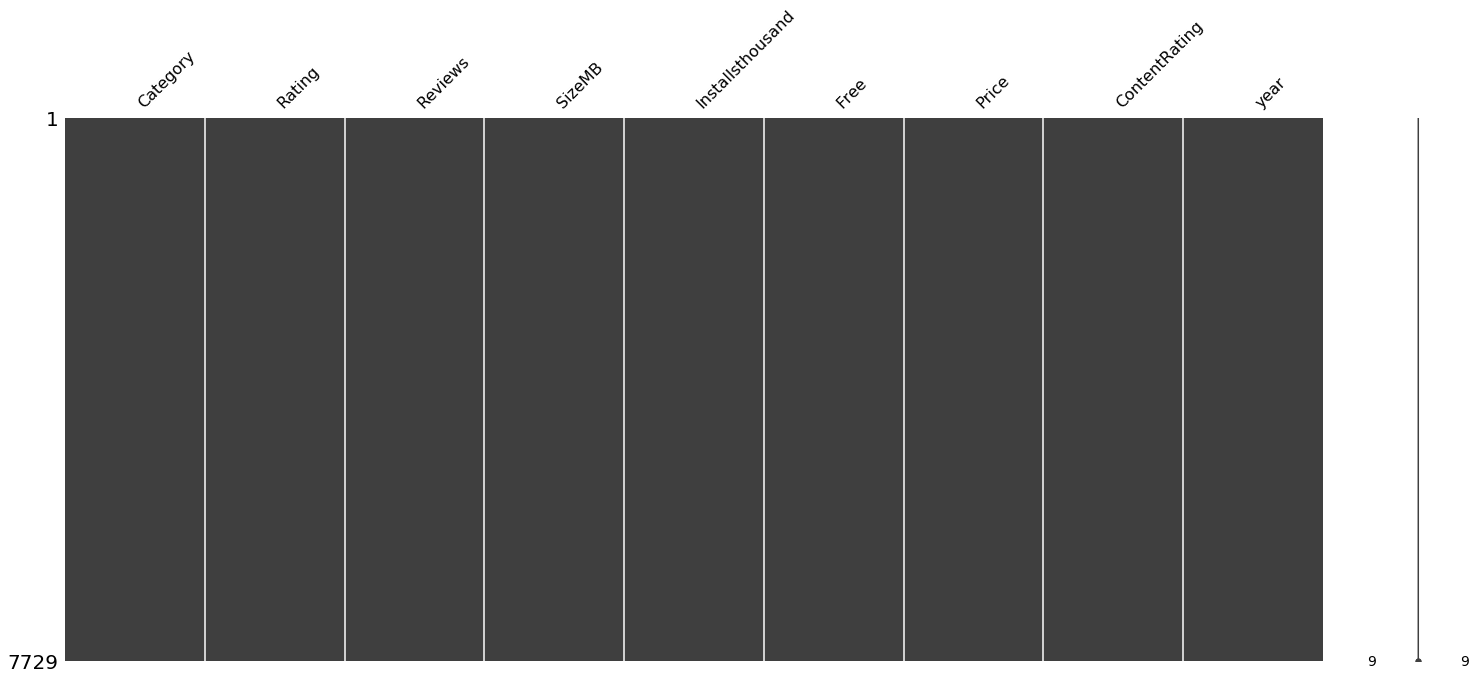

In [9]:
# plot missing variable
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline 

import missingno as mn

mn.matrix(df.sort_values(by=["Rating","Installsthousand","ContentRating",]))

In [10]:
#drop rows that had missing values 
df.dropna(inplace=True)

D:\APP\conda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


So that in the dataset, there are some missing values, which in size, rating etc.
I decided to drop all the missing value rows because if there are missing rating for an app, it is not useful for our analysis.
The variables i choose are all related to the final prediction, so I drop instead of imputing.
The reason of why there are some missing data is because there are some app just release, so that there are still no rating yet,
or some app are just dead, no one cares about, so that dropping all those data is a good choice.

In [11]:
print(df.dtypes)
print('===========')
print(df.info())

Category             object
Rating              float64
Reviews               int64
SizeMB              float64
Installsthousand    float64
Free                  int64
Price               float64
ContentRating        object
year                  int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7729 entries, 0 to 10840
Data columns (total 9 columns):
Category            7729 non-null object
Rating              7729 non-null float64
Reviews             7729 non-null int64
SizeMB              7729 non-null float64
Installsthousand    7729 non-null float64
Free                7729 non-null int64
Price               7729 non-null float64
ContentRating       7729 non-null object
year                7729 non-null int64
dtypes: float64(4), int64(3), object(2)
memory usage: 603.8+ KB
None


After we dropped all missing values, the dataset left is 7729 rows, which is good, enough for further analysis.

## 3. Data Visualization

### 3.1 Number of apps by year for their last update (single attributes 1)

In [12]:
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline 

print('Matplotlib:', matplotlib. __version__)


Matplotlib: 3.0.3


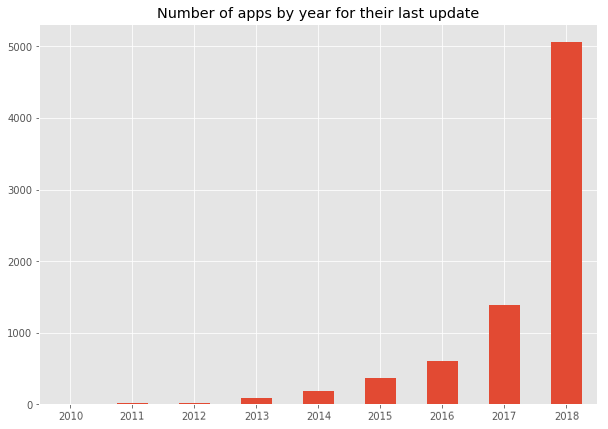

In [13]:
plt.style.use('ggplot')

plt.figure(figsize=(10,7))
df['year'].value_counts(sort=True,ascending=True).plot(kind='bar',rot=1)

plt.title('Number of apps by year for their last update')

plt.show()

We can see that for the majority of apps have last update in 2018 which is over about 66.6%
for the whole dataset, which is reasonable. Because in order to success in app development, you need
to update your app to fix bugs or update new contents. But we can see that there are still some 
apps have not been updated for a year, maybe some apps have done their job and no need for upgrade.
Or the developement team are giveup some apps.

### 3.2 Violin plot of Rating (single attributes 2)

In [12]:
import seaborn as sns
cmap = sns.diverging_palette(220, 10, as_cmap=True) # one of the many color mappings

print('Seaborn:', sns. __version__)

Seaborn: 0.9.0


D:\APP\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


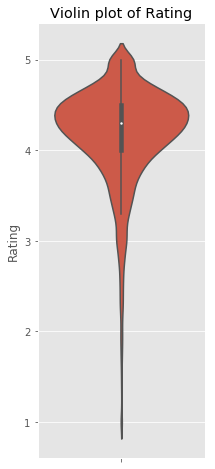

In [13]:
# sns violin
plt.subplots(figsize=(3, 8))

sns.violinplot( y=df["Rating"] )
plt.title('Violin plot of Rating')

plt.show()

This is violin plot rating, we can see the majority of rating is around 4.3, we can say that the majority range is around 4.0-4.7. 
There are some outlier, I think the rating lower than 3.0 can be outlier. 

### 3.3 Violin plot of SizeMB(single attributes 3)

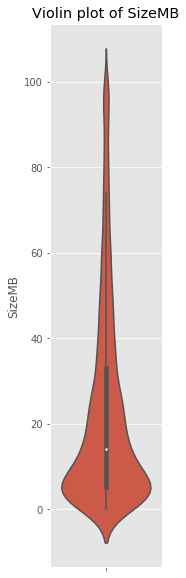

In [14]:
plt.subplots(figsize=(2, 10))

sns.violinplot( y=df["SizeMB"] )
plt.title('Violin plot of SizeMB')

plt.show()

This is violin plot about app size, we can see the majority of size is around 5-20 MB, we can say that the majority range is around 4.0-4.7. 
There are some outlier, I think the size higher than 60 MB can be outlier. In real life, there are not much app large than 60 MB. 

As I know, some people still use old phone, the storage space is not big, so that larger apps are not popular.

### 3.4 Distribution of free and non free apps(single attributes 4)

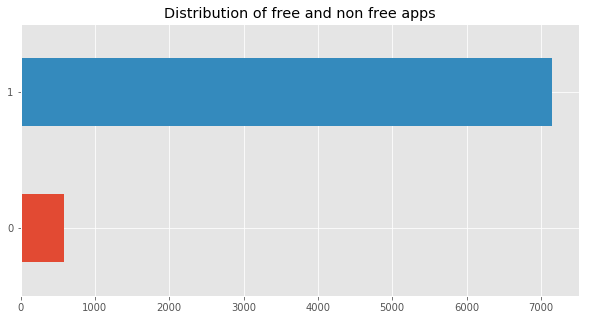

In [15]:
plt.style.use('ggplot')

plt.figure(figsize=(10,5))
df['Free'].value_counts(sort=True,ascending=True).plot(kind='barh')
plt.title('Distribution of free and non free apps')


plt.show()

This is histogram plot of free and non free apps, it is easy to see that there is not much paid apps.

### 3.5 Distribution of content rating group apps(single attributes 5)

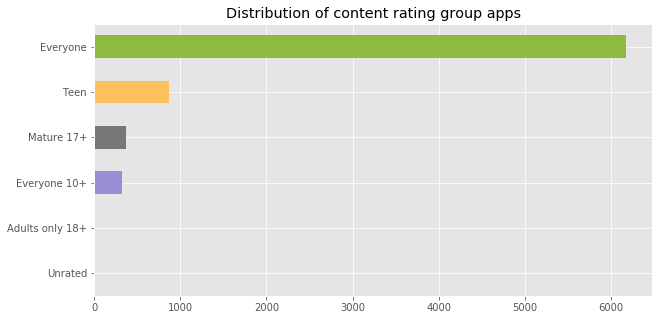

In [16]:
plt.style.use('ggplot')

plt.figure(figsize=(10,5))
df['ContentRating'].value_counts(sort=True,ascending=True).plot(kind='barh')
plt.title('Distribution of content rating group apps')

plt.show()

We can see that for most app is target for everyone, this will have more pentital to expanse the range of target audience.
The other target audience are not much. I believe target everyone will be good for business.

### 3.6 Distribution of apps category(single attributes 6)

Text(0.5, 1.0, 'Distribution of apps category')

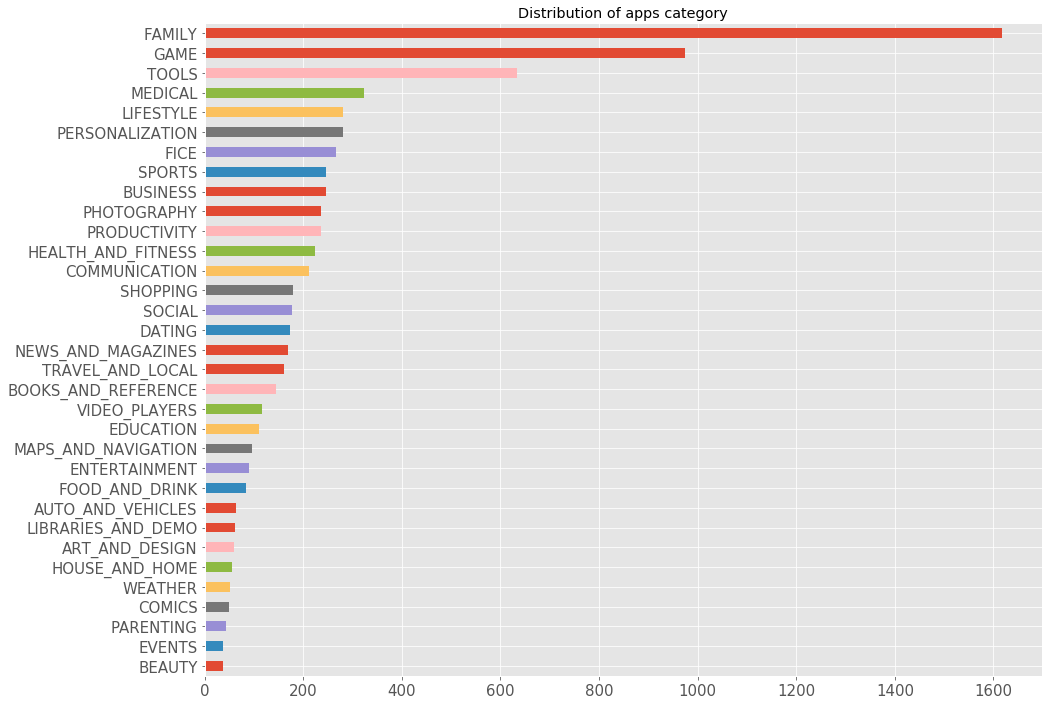

In [17]:
#https://pandas.pydata.org/pandas-docs/stable/reference/series.html
plt.figure(figsize=(15,12))
df['Category'].value_counts(ascending=True).plot(kind='barh',fontsize=15)
plt.title('Distribution of apps category')

This is number of apps in each category. Family have the most apps, I think in family category, there are so many shopping apps such as AMC, daily care, etc. I think the definition of family is so wide, so that so many other apps in it. The second largest category is game, no suprised for that. Tool and medical are also related to daily life, so it is also frequently appear. Other category just not that popular.

## 4. Visualize relationships

### 4.1 Relationship between year & rating & installations (Relationship 1 & 2)

D:\APP\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
D:\APP\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  app.launch_new_instance()


Text(0.5, 1.0, 'App last update year vs Installations')

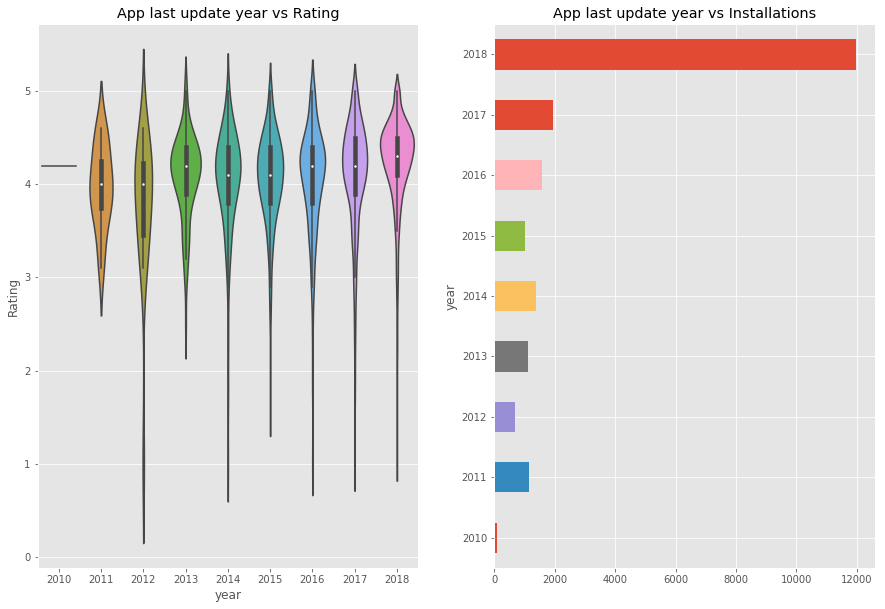

In [18]:
#https://pandas.pydata.org/pandas-docs/stable/reference/series.html
import seaborn as sns
cmap = sns.diverging_palette(220, 10, as_cmap=True) # one of the many color mappings
#group by year
plt.style.use('ggplot')
df_grouped_year = df.groupby(by=['year'])
plt.figure(figsize=(15,10))

#plot rating by year
plt.subplot(1,2,1)
sns.violinplot(x="year", y="Rating", data=df)
plt.title('App last update year vs Rating')

#plot mean installations by year
plt.subplot(1,2,2)
df.update_install = df_grouped_year.Installsthousand.mean()
ax = df.update_install.plot(kind='barh',fontsize=10,)
plt.title('App last update year vs Installations')


Doing further analysis about the last update in year, in the left is the average rating in years. We can see that the rating for each year is kind of similar around 4.2, and it have a trend of increasing from year to year. And as year increase, the rating is more concentrated within the mean rating. For the app have not update with in a year, there rating is more disperse.

The plot in the right is represent the average installation by year. We can clearly see that 2018 have the most installation, which make sense, because commonly updated app will have more people using. if your app is out of update since a year, the installations will get really low. So that app developer should persistently update their app.

### 4.2 Heatmap (Relationship 3)

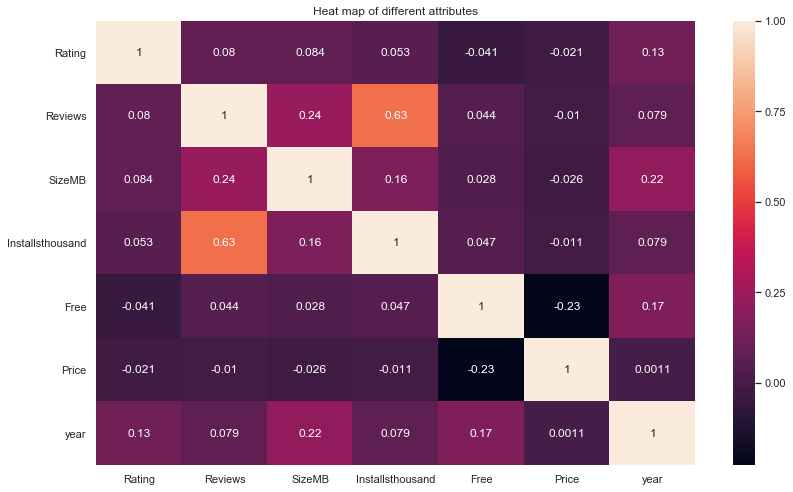

In [19]:
# the correlation heat map

import seaborn as sns
cmap = sns.set(style="darkgrid") # one of the many styles to plot using

f, ax = plt.subplots(figsize=(12, 7))
sns.heatmap(df.corr(), cmap=cmap, annot=True)
plt.title('Heat map of different attributes')

f.tight_layout()

From this heat map, we can see that review and installations ahve high correlation. this make sense because more people download the apps, there are higher chance that people will leave reviews. Other variables do not show any high correlations.

### 4.3 App not free rate by category (Relationship 4)

In [20]:
# grouped by department and count the total app distribute
df_grouped_Category = df.groupby(by=['Category'])
for val,grp in df_grouped_Category:
    print('There were',len(grp),'apps in',val +'.')


There were 59 apps in ART_AND_DESIGN.
There were 63 apps in AUTO_AND_VEHICLES.
There were 37 apps in BEAUTY.
There were 144 apps in BOOKS_AND_REFERENCE.
There were 246 apps in BUSINESS.
There were 49 apps in COMICS.
There were 211 apps in COMMUNICATION.
There were 173 apps in DATING.
There were 110 apps in EDUCATION.
There were 90 apps in ENTERTAINMENT.
There were 38 apps in EVENTS.
There were 1617 apps in FAMILY.
There were 266 apps in FICE.
There were 84 apps in FOOD_AND_DRINK.
There were 974 apps in GAME.
There were 223 apps in HEALTH_AND_FITNESS.
There were 56 apps in HOUSE_AND_HOME.
There were 62 apps in LIBRARIES_AND_DEMO.
There were 280 apps in LIFESTYLE.
There were 95 apps in MAPS_AND_NAVIGATION.
There were 324 apps in MEDICAL.
There were 169 apps in NEWS_AND_MAGAZINES.
There were 44 apps in PARENTING.
There were 280 apps in PERSONALIZATION.
There were 236 apps in PHOTOGRAPHY.
There were 235 apps in PRODUCTIVITY.
There were 179 apps in SHOPPING.
There were 177 apps in SOCIAL.
T

D:\APP\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  after removing the cwd from sys.path.


Text(0.5, 1.0, 'App not free rate by category')

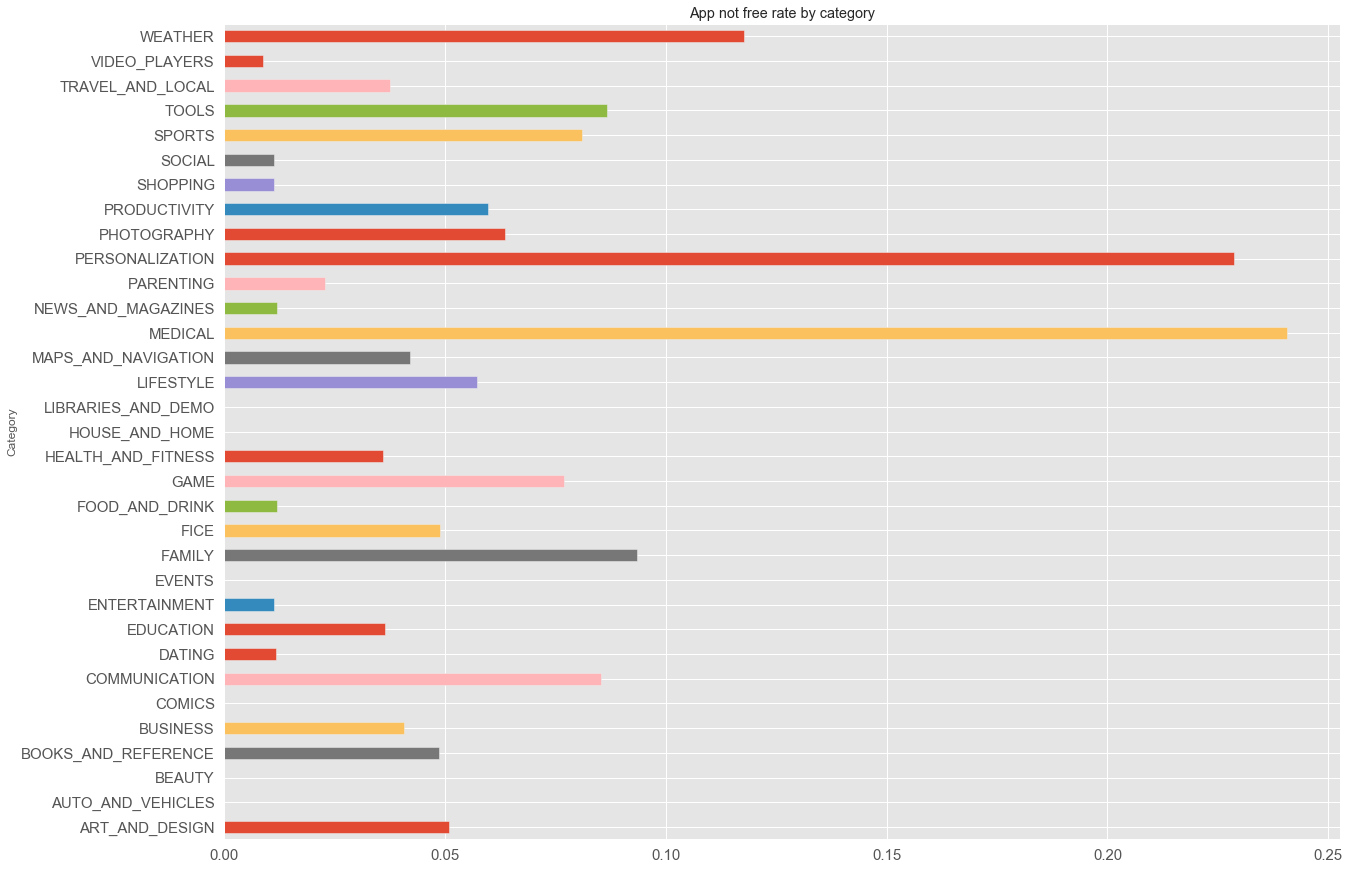

In [21]:
#plot app non free rate by category
plt.style.use('ggplot')
plt.figure(figsize=(20,15))
df.app_notfree_rate = (df_grouped_Category.Free.count()-df_grouped_Category.Free.sum()) / df_grouped_Category.Free.count()
ax = df.app_notfree_rate.plot(kind='barh',fontsize=15,)
plt.title('App not free rate by category')


This is apps are not free by different category. Medical app have the most non free ratio, because medical app usually are really professional and need a lot of professional knowledge. Some apps have consulting function, so app itself will charge and if you need additional services, you need pay more. We can see that personalization have the second most not free rate. I think because personalization need a lot of personalized feature in app which sometimes need to develop for different people, so they charge money for that. Other than those two category, other category have non free ratio less than 0.1, which is reasonable.


### 4.4 Mean of Rating for each Category (Relationship 5)

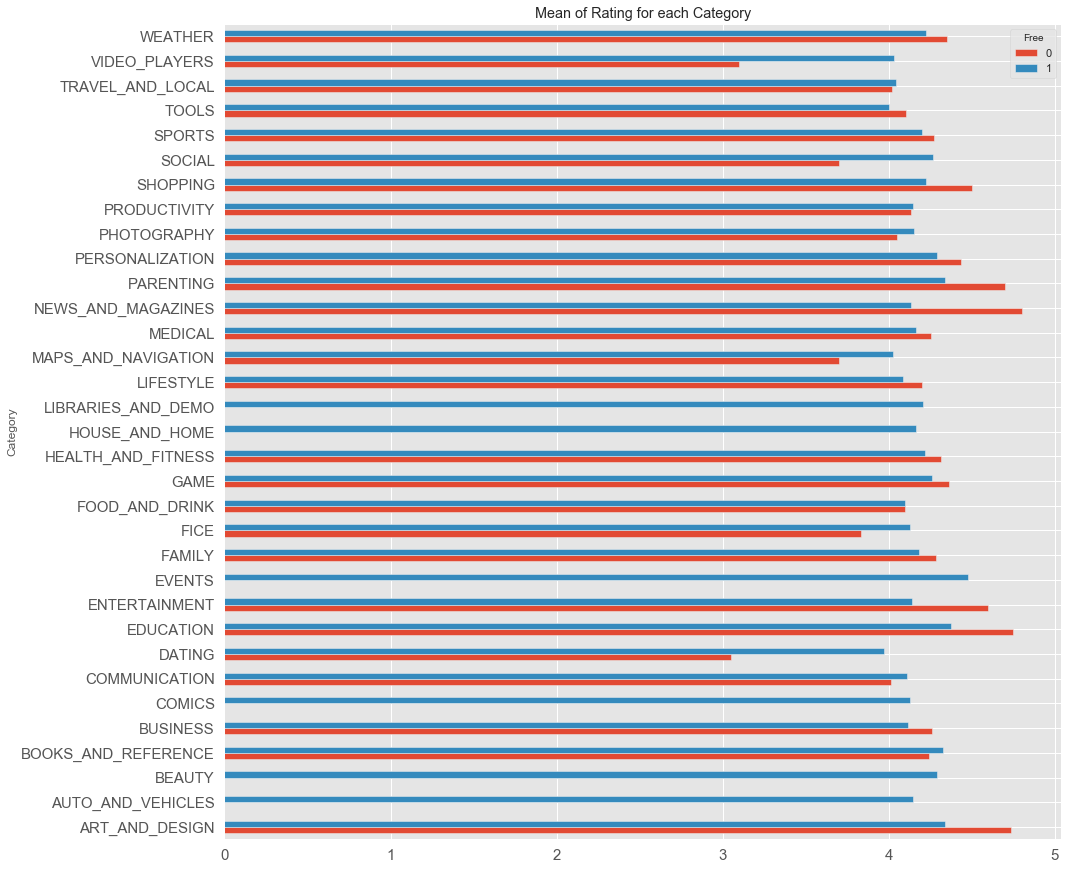

In [22]:
#https://pandas.pydata.org/pandas-docs/stable/reference/series.html
plt.rcParams["figure.figsize"] = [15, 15]

df_agg = df.groupby(['Category', 'Free'])['Rating'].mean().unstack()
df_agg.plot(kind='barh', stacked=False, fontsize=15, title="Mean of Rating for each Category")


This is mean of rating for each category, we can not say their rating have huge difference between each other. They are some categories have higher rating, such as news and magazines for free app, have much higher rating, also education and arts are higher. But we can not really say why they are higher base on the result. 

On the other hand, free and non free app are interesting. for the most categories, there is no huge difference between free and non free apps, so I can say that for those apps, free or not is not directly effect the score base on the result. Non free apps can be really good, people will not rating low just because of the price. 

However, news and magazines , free app have much higher rating than non free apps,the reason I think is that for the most news ,we can get from internet free, if you do not have a news app installed, you can just open web browser on phone and find so many free news. Same story for magazines, we can read by paper, or computer. We have so many alternative way to get those information. If the app is free, it is perfect, becaue apps will collect and classify those information for you. You can read news or magazines on the way home or anywhere, that is way rating for them is so high on free app. But when the app charge, people will not buy it, because there are so many easy and free way to get it.

Not like the medical apps, people will not easily get free informations, and also paid medical apps usually provide additional services. So the rating do not have huge difference between free and non free.

## 5. Dimensionality Reduction t-sne

In [16]:
import sklearn
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

#select the subset I want
dftsne = df[['Rating','Reviews','SizeMB','Installsthousand','Free','year']]

print(dftsne.info())

#implement t-sne
X_tsne = TSNE(learning_rate=100,n_components=2).fit_transform(dftsne)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7729 entries, 0 to 10840
Data columns (total 6 columns):
Rating              7729 non-null float64
Reviews             7729 non-null int64
SizeMB              7729 non-null float64
Installsthousand    7729 non-null float64
Free                7729 non-null int64
year                7729 non-null int64
dtypes: float64(3), int64(3)
memory usage: 422.7 KB
None


Text(0.5, 1.0, 't-sne by installations')

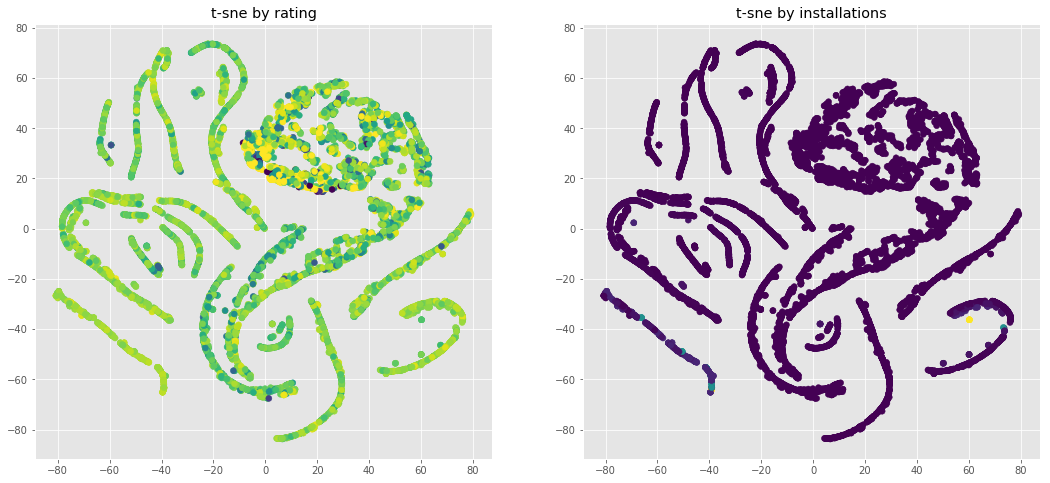

In [17]:
plt.figure(figsize=(18, 8))

plt.subplot(1,2,1)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=dftsne.Rating)
plt.title('t-sne by rating')

plt.subplot(1,2,2)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=dftsne.Installsthousand)
plt.title('t-sne by installations')


http://alexanderfabisch.github.io/t-sne-in-scikit-learn.html

t-SNE is reduces the dimensionality method. It converts distances between data in the original space to probabilities. First, we compute conditional probabilities. Similar objects have a high probability of being picked. the main difference between pca is the way of they put similar objects together.

I reduce the data dimension from 6 to 2. Plot in the left is t-sne plot coloed by installations. Because of there are large variety range of installations number, so that it is not much clear information. The plot in the left is t-sne plot colored by rating which give more details comparing to the plot in left. The rating is also a potential target prediction. Here we can see that there is no group of dataset can be separated quite easily. The most of point just overlay each other an not clear cluster shows up. 